In [1]:
# Read Libraries
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [4]:
# Load Data
data = pd.read_csv(".../Shifted_data.csv")
# Forward fill missing values
data = data.fillna(method='ffill')

,Patient_ID,Date_of_visit,Pyramidal,Cerebellar,Thronchioencephalic,Sensitive,Sphincteric,Visual,Mental,Deambulation,EDSS_score_assessed_by_clinician,Sex,MS.in.pediatric.age,Age,Relapse_number
0,2774,2013-05-07,1,0,0,0,1,0,1,0,1.0,0,0,30,1
1,2774,2013-12-04,1,0,0,0,0,0,0,0,1.0,0,0,31,1
2,2774,2015-04-09,1,2,1,2,1,0,0,0,1.0,0,0,32,1
3,2774,2015-06-17,1,1,1,1,0,1,0,0,0.0,0,0,32,1
4,2774,2015-11-11,3,3,2,2,0,2,2,5,0.0,0,0,32,1


In [46]:
# Define a function to calculate relative year
def calculate_year(row):
    patient_id = row['Patient_id']
    observation_date = row['Date_of_visit']
    first_date = patient_first_dates[patient_id]
    year_diff = observation_date.year - first_date.year
    month_diff = (observation_date.month >= first_date.month)
    return year_diff + (month_diff / 12)

def calculate_month(row):
    patient_id = row['Patient_id']
    observation_date = row['Date_of_visit']
    first_date = patient_first_dates[patient_id]
    month_diff = (observation_date.year - first_date.year) * 12 + observation_date.month - first_date.month
    return month_diff

def calculate_day(row):
    patient_id = row['Patient_id']
    observation_date = row['Date_of_visit']
    first_date = patient_first_dates[patient_id]
    day_diff = observation_date - first_date
    return day_diff

def calculate_week(row):
    patient_id = row['Patient_id']
    observation_date = row['Date_of_visit']
    first_date = patient_first_dates[patient_id]
    week_diff = round((observation_date - first_date).days / 7,2)
    return week_diff


In [48]:
data['Date_of_visit'] = pd.to_datetime(data['Date_of_visit'], format='%Y-%m-%d')
data["Year_visit"] = data['Date_of_visit'].dt.year
# Create a new column to count occurrences of each patient ID
data['Observation_times'] = data.groupby('Patient_id')['Patient_id'].transform('count')
# Filter data to exclude patients with only one observation
data = data[data['Observation_times'] != 1]

In [49]:
# Apply the function to create the 'year' feature (consider vectorization for efficiency)
data['year_diff_firstvisit'] = data.apply(calculate_year, axis=1)
data["year_diff_firstvisit"] = data["year_diff_firstvisit"].round().astype(int)

data['month_diff_firstvisit'] = data.apply(calculate_month, axis=1)
data["month_diff_firstvisit"] = data["month_diff_firstvisit"].astype(int)

data['week_diff_firstvisit'] = data.apply(calculate_week, axis=1)
data["week_diff_firstvisit"] = data["week_diff_firstvisit"].astype(int)

data['day_diff_firstvisit'] = data.apply(calculate_day, axis=1)
data["day_diff_firstvisit"] = data["day_diff_firstvisit"].astype(int)

data.to_csv("Shiftted_data_with_year_month_week_day.csv", index= False)

In [ ]:
# Get the first date of visit for each patient
patient_first_dates = data.groupby('Patient_id')['Date_of_visit'].min()
patient_last_dates = data.groupby('Patient_id')['Date_of_visit'].max()

diff = round((patient_last_dates - patient_first_dates).dt.days / 7,2)
diff

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[timedelta64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

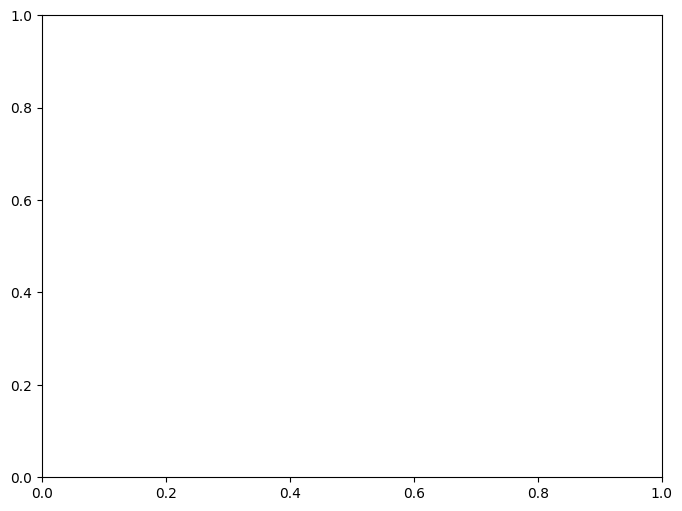

In [50]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['day_diff_firstvisit'], data['EDSS_score_assessed_by_clinician'])
plt.xlabel('day since first visit')
plt.ylabel('EDSS score')
plt.title('Scatter plot of EDSS score vs Day')
plt.grid(True)
plt.show()